# Auto MPG Regression Project — Draft Notebook
This notebook explores the **Auto MPG dataset** from Kaggle

Goal: Predict a vehicle's MPG (miles per gallon) using its physical and performance characteristics.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("auto-mpg.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [25]:
print(df.info())
print(df.describe())

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000   

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [26]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

df = df.drop(columns=['car name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Experiment 1: Linear Regression
We’ll start simple — using only numeric features and a basic Linear Regression model.

In [6]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Experiment 1 — Linear Regression")
print("RMSE:", rmse)
print("R² Score:", r2)

Experiment 1 — Linear Regression
RMSE: 3.8297880635592065
R² Score: 0.7272038917065149


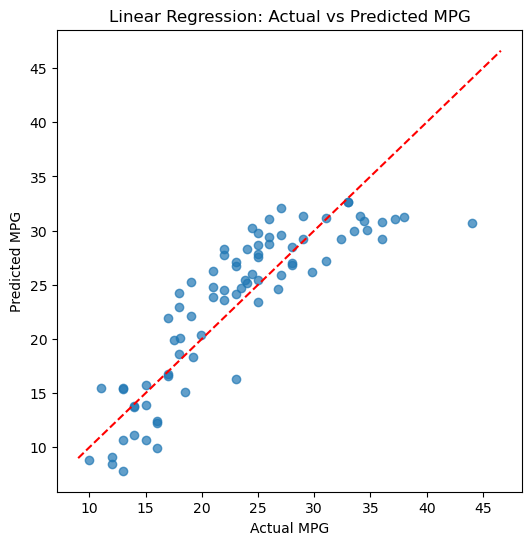

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Linear Regression: Actual vs Predicted MPG")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.savefig("reg1.png")

## Experiment 2: Polynomial Regression
We’ll add non-linear relationships using polynomial features to see if model performance improves.

In [12]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2)

In [13]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_p, y_train_p)

y_pred_p = poly_reg.predict(X_test_p)

In [14]:
rmse_p = np.sqrt(mean_squared_error(y_test_p, y_pred_p))
r2_p = r2_score(y_test_p, y_pred_p)

print("Experiment 2 — Polynomial Regression (degree=2)")
print("RMSE:", rmse_p)
print("R² Score:", r2_p)

Experiment 2 — Polynomial Regression (degree=2)
RMSE: 3.592381531924167
R² Score: 0.7929542999257612


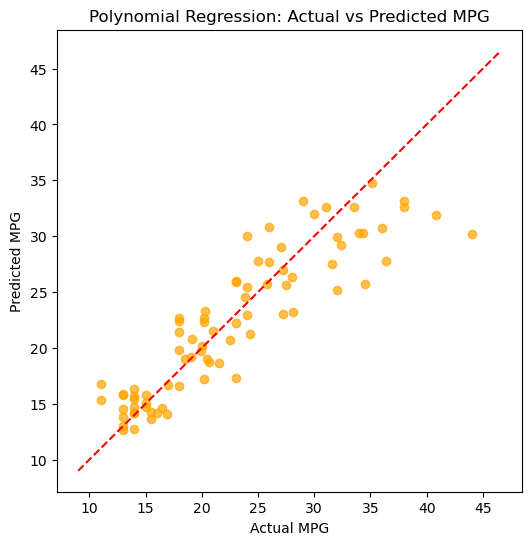

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_p, y_pred_p, alpha=0.7, color='orange')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Polynomial Regression: Actual vs Predicted MPG")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.savefig("reg2.png")

## Experiment 3: Ridge Regression
We’ll use Ridge regression to reduce overfitting and see if performance improves compared to linear regression.

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y, test_size=0.2)

In [21]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_r, y_train_r)

y_pred_r = ridge.predict(X_test_r)

In [22]:
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2_r = r2_score(y_test_r, y_pred_r)

print("Experiment 3 — Ridge Regression")
print("RMSE:", rmse_r)
print("R² Score:", r2_r)

Experiment 3 — Ridge Regression
RMSE: 4.447625110018687
R² Score: 0.5977024104334142


In [23]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression (deg=2)", "Ridge Regression"],
    "RMSE": [rmse, rmse_p, rmse_r],
    "R2": [r2, r2_p, r2_r]
})
results

,Model,RMSE,R2
0,Linear Regression,3.829788,0.727204
1,Polynomial Regression (deg=2),3.592382,0.792954
2,Ridge Regression,4.447625,0.597702
